# Section VI. CALIBRATION AND LEARNING

# Chapter 22. Calibration

<style>
div.figcaption {    
    text-align: center;
    margin-left:1em;
    margin-top:1em;
    margin-right:1em;
    margin-bottom:1em;
    }
</style>

Calibration is one of the most important steps to take toward building a high performance robotic sysystem.  The precision by which a robot can navigate and manipulate objects is almost entirely dependent on having meaningful, accurate models of physical quantities.  For example, a forward model of a sensor predicts what the robot will observe given certain physical quantities; an inverse sensor model predicts what physical quantities correspond to observations.  A kinematics model with accurate link lengths, reference tranforms, and joint axes is crucial for forward and inverse kinematics.  Physics models predict the outcomes of the robot interacting with the world.  In each of these cases, poor calibration can cause catastrophic failures; good calibration helps crush your competitors!

For whatever reason, calibration has a sort of reputation for being an "unsexy" topic, and most students approach it as a sort of bitter pill to swallow in order to make a robot work.  It is perhaps a surprise then, that the techniques and processes used in calibration are essentially the same as in the relatively "flashy" subject of machine learning!  So this negative reputation is really undeserved: in both calibration and learning, we use observations of the real world (data) to build computational representations of the world (models) which can then be used to make predictions; in both fields, we must concern ourselves with the same general procedure.  First, the *data gathering process* should produce meaningful observations that reflect real-world conditions; next, *model fitting* should propose and estimate parameters of a model that matches the data; and finally, *performance measurement* obtains meaningful estimates of the predictive accuracy of our models.  The main difference between calibration and learning is that in calibration, the role of the engineer is to propose models based on _knowledge_ (e.g., kinematics, physics, and sensor models), while in machine learning the role of the engineer is to achieve good performance by whatever means necessary.

## Calibration framework

### General process

The general calibration framework is a five step process:

1. Establish a **calibration procedure** allows the robot to observe some **ground truth**, i.e., trusted measurements of the phenomenon of interest.  Ground truth can be established using a _calibration rig_ , precision measurement device, or human annotation.

2. Develop a **parametric model** relating ground truth to the robot's sensor measurements (observations).  Ground truth and observations are linked via a set of unknown parameters.  This could be a _forward model_ that predicts observations from ground truth, or an _inverse model_ that predicts ground truth from observations.

3. Execute the calibration procedure to **acquire a dataset** of several observations and ground truth measurements. 

4. **Estimate the parameters** of the model to minimize prediction error.

Developing a calibration procedure often requires some ingenuity to ensure identifiability of the parameters of interest, as well as to keep the procedure convenient.


### Examples

#### Actuator / encoder calibration

#### Camera intrinsic calibration

#### Camera extrinsic calibration

#### Kinematic parameter calibration

#### Force/torque sensor calibration

#### Dynamic parameter calibration

### Automatic vs human-in-the-loop calibration

## Model fitting

Let $\mathbf{z}$ be the vector of the robot's observations and $\mathbf{w}$ be the ground truth.  A forward model is a function $\mathbf{z} = f(\mathbf{w})$ which predicts the observations from ground truth, while an inverse model $\mathbf{w} = f(\mathbf{z})$ does the converse.  In either case, we would like to generate some function $\mathbf{y} = f(\mathbf{x})$, with inputs $\mathbf{x}$ and outputs $\mathbf{y}$ defined accordingly, that makes accurate predictions for all $\mathbf{x}$ in its domain.

A _dataset_ $D$ consists of $N$ paired inputs and outputs $D=\{ (\mathbf{x}^{(1)},\mathbf{y}^{(1)}), \ldots, (\mathbf{x}^{(N)},\mathbf{y}^{(N)}) \}$, where we assume $\mathbf{y}^{(i)} = f(\mathbf{x}^{(i)})$ for all $i$.  The goal of model fitting is to estimate a function $\hat{f} \approx f$ so that the error between each the true output and the predicted output is low.  Here, the notation $\hat{f}$ distinguishes the estimated model from the "true function" $f$.  But from now on, we will deal only with estimated models, so our notation will drop the $\hat{\cdot}$ for simplicity.

Specifically, we define an _error function_
$$ E(f;D) = \sum_{i=1}^N e(\mathbf{y}^{(i)},f(\mathbf{x}^{(i)})) $$
with $e(\mathbf{y},\hat{\mathbf{y}})$ a _loss function_ (a.k.a. _cost function_ ) that measures some notion of prediction error.  The most common loss function used in calibration is the *quadratic loss*
$$e(\mathbf{y},\hat{\mathbf{y}}) = \| \mathbf{y} - \hat{\mathbf{y}} \|^2.$$
Model fitting seeks a model $f$ that achieves a low value of $E(f;D)$.

### Tabulation methods

For low dimensional, directly related, and noiseless inputs and outputs, we can simply _tabulate_ the relationship between $\mathbf{x}$ and $\mathbf{y}$.  For example, the torque curve of a motor relates speed to torque, and can be obtained simply by controlling speed across a grid of values $x^1,\ldots,x^N$ and measuring torque $y^1,\ldots,y^N$ at each value.  Simply "connecting the dots" allows the model to achieve zero error on the dataset, and it predicts the value of $y$ for a given value of $\mathbf{x} \notin \{x^1, \ldots,x^N \}$ using interpolation. 

Tabulation can only be applied in low dimensional input spaces, because at roughly 4 dimensions or higher, the size of the input grid grows large, which requires an impractical number of experiments.  A tabulation approach also has the problem that the model is non-differentiable, which is a disadvantage if the model must need to be used for optimization.


### Parametric methods

More commonly we define a _parametric model_.  These are functions of the form $\mathbf{y} = f(\mathbf{x};\mathbf{\theta})$, in which $\mathbf{\theta}$ is a set of unknown parameters.  As $\mathbf{\theta}$ varies, the actual predictive model $f_{\mathbf{\theta}}(\mathbf{x}) \equiv f(\mathbf{x};\mathbf{\theta})$ changes.  However, $f$ is a fixed function of both $\mathbf{x}$ and $\mathbf{\theta}$.  This representation is said to define a _function class_ &mdash; a set of possible models.  Our goal is to find a single value of $\mathbf{\theta}^\star$ &mdash; and hence a single model &mdash; that minimizes the error:

$$ \mathbf{\theta}^\star = \min_{\mathbf{\theta}} E(\mathbf{\theta};D) = \sum_{i=1}^N e(\mathbf{y}^{(i)},f(\mathbf{x}^{(i)};\mathbf{\theta})). $$

As a very simple example, suppose a servomotor takes as input consisting of $z_s$ a 7-bit integer from $[0,127]$ defining speed, $z_d$ a single bit defining direction, and outputs $z_a$ a 16-bit integer from [0,65536] defining the current angle read by the encoders.  A common assumption is that the true angular velocity $\dot{q}$ is linear in $z_s \cdot 2(z_d-0.5)$ (where $2(z_d-0.5)$ is the sign $\pm 1$) and the current angle $q$ is linear in $z_d$.  So, we hypothesize the relationships $\dot{q} = 2 \theta_s z_s(z_d-0.5)$, with $\theta_s$ an unknown speed coefficient, and $q = \theta_0 + z_a \theta_a$, with $\theta_0$ the unknown zero position and $\theta_a$ an unknown angular range coefficient.  Any set of coefficients $(\theta_s, \theta_0, \theta_a)$ generates a possible model from this class of models, but given enough data points, only one will minimize the error.

As you might imagine, figuring out these coefficients with two measurements can be done through simple algebra.  Suppose we command an arbitrary nonzero velocity $z_s^{(1)}$ and direction $z_d^{(1)}$ for duration $t$, and then observe movement from $z_a^{(1)}$ to $z_a^{(2)}$ corresponding to physical servo angles $q^{(1)}$ and $q^{(2)}$.  ($q$ can be measured to high precision using multiple methods, such as measuring the angle of a reference point on an image, given a camera pointed head on to the motor; or using precisely constructed physical stops).  Using the relationship $q^{(2)} - q^{(1)} = (z_a^{(2)}-z_a^{(1)}) \theta_a$ we can set
$$\theta_a = \frac{q^{(2)} - q^{(1)}}{z_a^{(2)}-z_a^{(1)}}$$
and then
$$\theta_0 = q^{(1)} - \theta_a z_a^{(1)}.$$
Estimating $\dot{q} = (q^{(2)}-q^{(1)})/t$ you can set
$$\theta_s = \frac{q^{(2)}-q^{(1)}}{2 t z_s^{(1)}(z_d^{(1)}-0.5)}.$$

This connect-the-dots construction, however, is only correct under perfect precision for each measurement.  Real servomotors have quantization error (a range of continuous values corresponding to one discrete measurement) and the physical servo angle measurements will be noisy.  Moreover, the uniform velocity assumption may not exactly hold due to ramping, backlash in the motors, friction, and other effects.


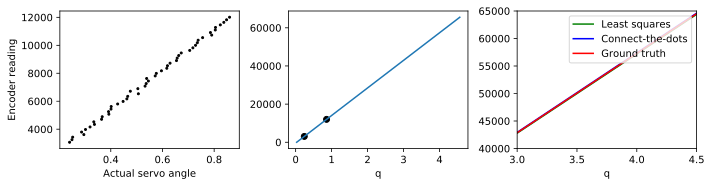

In [12]:
#Code for the linear model fitting figure
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import math

#come up with some random data
N=50
qs = np.linspace(0.24,0.86,N)
za = np.linspace(3065.4,12008.7,N)
qs_noisy = qs + np.random.randn(N)*0.01
za_quantized = np.round(za)

fig = plt.figure(figsize=(10,2.7))
axdata = fig.add_subplot(131)
axsimple = fig.add_subplot(132)
axlstsq = fig.add_subplot(133)
axdata.scatter(qs_noisy,za_quantized,c='k',s=4)
axdata.set_xlabel('Actual servo angle')
axdata.set_ylabel('Encoder reading')
axsimple.scatter([qs_noisy[0],qs_noisy[-1]],[za_quantized[0],za_quantized[-1]],c='k')
thetaa = float(qs_noisy[-1]-qs_noisy[0])/float(za_quantized[-1]-za_quantized[0])
theta0 = qs_noisy[0]-thetaa*za_quantized[0]
zrange = np.array([0,65536])
axsimple.plot(theta0+zrange*thetaa,zrange)
axsimple.set_xlabel('q')
axlstsq.scatter(qs_noisy,za_quantized,c='k',s=4)
axlstsq.set_xlabel('q')
A = np.column_stack((za_quantized,np.ones(N)))
res = np.linalg.lstsq(A,qs_noisy,rcond=None)
x = res[0]
residuals = res[1]
#print x,"RMSE",math.sqrt(residuals/N)
axlstsq.plot(x[1]+zrange*x[0],zrange,label="Least squares",color='g')
axlstsq.plot(theta0+zrange*thetaa,zrange,label="Connect-the-dots",color='b')
thetaa_true = float(qs[-1]-qs[0])/float(za[-1]-za[0])
theta0_true = qs[0]-thetaa_true*za[0]
axlstsq.plot(theta0_true+zrange*thetaa_true,zrange,label="Ground truth",color='r')
axlstsq.set_xlim(3,4.5)
axlstsq.set_ylim(40000,65000)
axlstsq.legend()
fig.tight_layout()

The figure above shows a set of corrupted measurements that lie approximately along a line. If we simply perform "connect-the-dots" on the endpoints, as shown in the middle plot, the model seems somewhat reasonable.  However, the noise at the endpoints leads to less accurate prediction outside of the range of the data.  The figure on the right shows a zoom-in to the upper right corner of the plot.  A better approach is to use all of the data to obtain a tighter fit.  Since we only have a couple of parameters to play with, we cannot hope to match all of the data points exactly, and instead we must settle for a _least squares_ fit.

### Ordinary (linear) least squares fitting

#### Multivariate input, univariate output

Let us for now assume that the output is 1D and the input has $n$ dimensions.  Linear least squares fitting assumes the model is linear with one coefficient per input dimension.  Specifically:

$$y = f(\mathbf{x};\mathbf{\theta}) = \sum_{k=1}^n x_k \theta_k = \mathbf{x}^T \mathbf{\theta}.$$

With this definition, it is straightforward to minimize a squared loss function

$$E(\mathbf{\theta},D) = \sum_{i=1}^N \| \mathbf{y}^{(i)} - \hat{\mathbf{y}}^{(i)} \|^2 = \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2$$

Replacing $\hat{y}^{(i)}$ with the expression for the prediction $f(\mathbf{x}^{(i)};\mathbf{\theta})$, we obtain

$$E(\mathbf{\theta},D) = \sum_{i=1}^N (y^{(i)} - \mathbf{x}^{(i)T} \mathbf{\theta})^2.$$

At this point it is helpful to view the sum-of-squares as a dot product of a vector $\mathbf{b}-A\mathbf{\theta}$ with itself, where
$$\mathbf{b} = \begin{bmatrix} y^{(1)} \\ \dots \\ y^{(N)} \end{bmatrix}$$

and the matrix $A$ is given by
$$A = \begin{bmatrix} \mathbf{x}^{(1)} & \cdots & \mathbf{x}^{(N)} \end{bmatrix}^T = \begin{bmatrix} \mathbf{x}^{(1)T} \\ \dots \\ \mathbf{x}^{(N)T} \end{bmatrix}.$$


In other words, each of the input data points is a row in A and each of the output data points is a corresponding row in $\mathbf{b}$.  Then, the error function is expressed 

$$E(\mathbf{\theta},D) = (\mathbf{b}-A\mathbf{\theta})^T (\mathbf{b}-A\mathbf{\theta}).$$

The minimizer $\mathbf{\theta}^\star$ of the error function is given by the well-known _least-squares formula_

$$\mathbf{\theta}^\star = (A^T A)^{-1} A^T \mathbf{b}, \label{eq:LeastSquares}$$

which is a unique global minimum provided that $A^T A$ is invertible.  This process is known as ordinary least squares (OLS).


#### Constant offsets

It is common to add a constant affine term, which allows the model to predict that the zero input has a nonzero output:
$$f(\mathbf{x};\mathbf{\theta}) = \theta_0 + \sum_{k=1}^n x_i \theta_i.$$

In this case, we can formulate the parameter vector $\mathbf{\theta} = (\theta_0,\theta_1,\ldots,\theta_n)$ and a least-squares $A$ matrix augmented with a leading column of 1's as follows:

$$A = \begin{bmatrix} 1 & \mathbf{x}^{(1)T} \\ \dots & \dots \\ 1 & \mathbf{x}^{(N)T} \end{bmatrix}.$$

In other words, we imagine each input vector to be augmented with a single observation of 1.  Simply applying the OLS formula $\eqref{eq:LeastSquares}$ directly to the augmented matrix gives us the optimal parameter vector including a leading constant.

#### Multivariate output is handled by multiple univariate models

In general, we would like to handle $m$-D outputs.  The general OLS strategy is simply to estimate $m$ separate univariate models, one for each dimension.

$$y_j = f_j(\mathbf{x};\mathbf{\theta}_j) = \mathbf{x}^T \mathbf{\theta}_j \text{ for each }j=1,\ldots,m.  $$

Here each of the $\mathbf{\theta}_j$ is an $n$-D vector, giving a total of $mn$ parameters.  In other words, the parameters form a matrix $\Theta$ such that the model is $\mathbf{y} = \Theta \mathbf{x}$, with each $\mathbf{\theta}_j$ a row of $\Theta$.

Since the parameters for each univariate model is separable from the rest, their parameters can be estimated independently.  Specifically, consider the quadratic loss $e(\mathbf{y},\hat{\mathbf{y}}) = \sum_{j=1}^m (y_j - \hat{y}_j)^2 = \sum_{j=1}^m (y_j - \mathbf{\theta}_j^T \mathbf{x})^2 $.  The overall error function can be rearranged into a sum of element-wise error functions, each of which depends only on a single parameter vector $\mathbf{\theta}_j$ as follows:

$$ E(\Theta;D) = \sum_{i=1}^N \sum_{j=1}^m (y_j^{(i)} - \mathbf{\theta}_j^T \mathbf{x}^{(i)})^2 = \sum_{j=1}^m  \sum_{i=1}^N (y_j^{(i)} - \mathbf{\theta}_j^T \mathbf{x}^{(i)})^2 = \sum_{j=1}^m E_j(\mathbf{\theta}_j;D). $$

The summands in the final expression are simply the univariate error functions for each element of $\mathbf{y}$.

### Nonlinear least squares fitting

Linear models are useful in some circumstances, but are extremely limiting.  In the general case we would like to be able to represent curves, oscillations, or even jumps.  We may formulate a general parametric model and then run standard optimization, such as gradient descent, to minimize the error function.

Suppose for example we observe that the error of a robot joint's controller decays over time, but also obeys some oscillation.  A potential parametric model for this behavior is a damped harmonic oscillator

$$y = f(x_0,\dot{x}_0,t;\theta_d,\theta_\omega) = \exp(-\theta_d t)(C_1 \cos(\theta_\omega t) + C_2 \sin(\theta_\omega t) $$

where $x_0$ is the initial error, $\dot{x}_0$ is the initial rate of change of the error, $t$ is a prediction horizon, and $y$ is the error at time $t$.  $C_1$ and $C_2$ are chosen to match the initial conditions $y = x_0$ and $\frac{d}{dt}y = \dot{x}_0$ at $t=0$:
$$C_1 = x_0,$$
$$C_2 = (\dot{x}_0 + \theta_d x_0)/\theta_\omega.$$

This defines a parameterized class of models with $\mathbf{\theta} = (\theta_d,\theta_\omega)$ for which we can go ahead and simply optimize the error function over all possible parameters:
$$\mathbf{\theta}^\star = \min_{\mathbf{\theta}} E(\mathbf{\theta};D)$$
with $E(\mathbf{\theta};D) = \sum_{i=1}^N e(y^{(i)},f(x_0^{(i)},\dot{x}_0^{(i)},t^{(i)};\mathbf{\theta}))$ the sum of losses over $D$ for the parameters $\mathbf{\theta}$. 

We can simply run a minimization process, such as gradient descent, quasi-Newton, or Newton's method (see [Appendix B.3](Optimization.ipynb)) to solve this problem.  However, as with any nonlinear optimization, such a process can be susceptible to local minima.


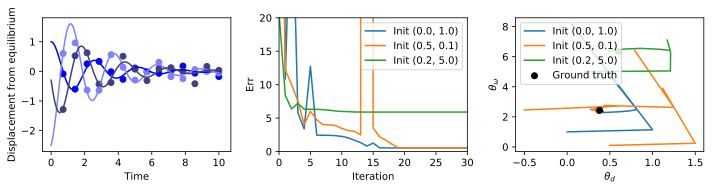

In [13]:
# Code for nonlinear least squares with a damped harmonic oscillator 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize,approx_fprime

thetad_true = 0.38
thetaw_true = 2.43

#for consistency
np.random.seed(1234)

def f(x,dx,t,thetad,thetaw):
    C1 = x
    C2 = (dx + thetad*x)/thetaw
    return np.exp(-thetad*t)*(C1*np.cos(thetaw*t) + C2*np.sin(thetaw*t))

fig = plt.figure(figsize=(10,2.7))
axdata = fig.add_subplot(131)
axsolve = fig.add_subplot(132)
axtrace = fig.add_subplot(133)
t = np.linspace(0,10,100)
xinits = [(1.0,0.0),(-2.5,2.0),(-0.3,-4.0)]
ys = []
for x in xinits:
    ys.append(f(x[0],x[1],t,thetad_true,thetaw_true))
tdata = np.linspace(0,10,15)[1:]
#simulate sensing error + time sampling jitter
tjitter = 0.05
noise = 0.1
ydatas = []
for x in xinits:
    ydatas.append(f(x[0],x[1],tdata + np.random.randn(len(tdata))*tjitter,thetad_true,thetaw_true) + np.random.randn(len(tdata))*noise)
colors = ['#0000ff','#8080ff','#404080']
for i,(y,yd) in enumerate(zip(ys,ydatas)):
    axdata.plot(t,y,color=colors[i])
    axdata.scatter(tdata,yd,c=colors[i])
axdata.set_xlabel("Time")
axdata.set_ylabel("Displacement from equilibrium")

trace = []
def E(theta):
    global xinits,ydatas
    err = 0.0
    for x,yd in zip(xinits,ydatas):
        ypred = f(x[0],x[1],tdata,theta[0],theta[1])
        err += np.dot(ypred-yd,ypred-yd)
    return err
def Etrace(theta):
    global trace
    err = E(theta)
    trace.append((theta,err))
    return err
def dE(theta):
     return approx_fprime(theta, E, 1e-4)

initial_guesses = [(0.,1.),(0.5,0.1),(0.2,5.0)]
for thetaguess in initial_guesses:
    trace = []
    res = minimize(Etrace,np.array(thetaguess),jac=dE)
    theta_trace = [x[0] for x in trace]
    err_trace = [x[1] for x in trace]
    axsolve.plot(range(len(err_trace)),err_trace,label="Init "+str(thetaguess))
    axtrace.plot([x[0] for x in theta_trace],[x[1] for x in theta_trace],label="Init "+str(thetaguess))
    axtrace.scatter([theta_trace[-1][0]],[theta_trace[-1][1]],zorder=3)
    #print thetaguess,theta_trace[-1]
axtrace.scatter([thetad_true],[thetaw_true],c='k',label="Ground truth",zorder=5)
axsolve.set_ylim(0.0,20.0)
axsolve.set_xlim(0.0,30.0)
axsolve.legend()
axsolve.set_xlabel("Iteration")
axsolve.set_ylabel("Err")
axtrace.set_xlabel(r"$\theta_d$")
axtrace.set_ylabel(r"$\theta_\omega$")
#axtrace.set_xlim(0.0,3.0)
#axtrace.set_ylim(0.0,1.6)
axtrace.legend()
fig.tight_layout()
#fig.show()

The leftmost plot in the above figure shows a simulated dataset of a damped harmonic oscillator of the form
$$\exp(-\theta_d t)\left( \cos(\theta_w t) + \frac{x^\prime + \theta_d x_0}{\theta_w} \sin(\theta_w t) \right)$$
where $(x_0,x^\prime_0)$ is the initial state and $\theta_d$ and $\theta_w$ are unknown parameters.  Note that the function is nonlinear in $\theta_d$ and $\theta_w$.
The calibration data includes 10-second traces, sampled every half-second, and initial state is assumed known.  The dataset is subject to noise in both the time and measurement axes.  

The right two figures show the convergence of a nonlinear least squares solver, initialized from different starting values.
For the initial guesses $\mathbf{\theta}=(0,1)$ and $\mathbf{\theta} = (0.5,0.1)$, optimization converges to a result very close to the true parameters.  However, the initial guess $\mathbf{\theta}=(0.2,5)$ fails to find the global optimum.

### Feature mapping

Because we cannot guarantee a global optimum of a nonlinear least squares problem, it would be helpful to leverage the benefits of OLS while allowing nonlinearity.  The notion of a _feature mapping_ allows us to apply OLS to estimate a quite versatile set of models.  Specifically, it can be applied to estimate the coefficients of any function of the form 

$$f(\mathbf{x};\mathbf{\theta}) = \sum_{k=1}^m \theta_k g_k(\mathbf{x})$$

where the set of $m$ functions $g_1,\ldots,g_m$ are known as the _feature mapping_ .  The model hypothesizes that the output is a linear function of points in the _feature space_ :

$$\mathbf{g}(\mathbf{x}) = \begin{bmatrix} g_1(\mathbf{x}) \\ \dots \\ g_m(\mathbf{x}) \end{bmatrix}. $$

And the parameter estimation is performed as usual with the $N \times m$ matrix $$A = \begin{bmatrix} \mathbf{g}(\mathbf{x}^{(1)})^T \\ \dots \\ \mathbf{g}(\mathbf{x}^{(N)})^T \end{bmatrix}.$$

The significance is that if the output is some linear combination of the elements of $\mathbf{g}$, then least squares fitting will perform well. 

As an example of a feature mapping is the set of polynomial models of the input.  We have seen univariate polynomial models of degree $d$

$$f(x;\mathbf{\theta}) = \sum_{k=0}^d \theta_k x^k$$

which can be expressed as a dot product between the $d+1$-D coefficient vector $(\theta_0,\ldots,\theta_d)$ and the _monomial basis functions_ $(0,x,x^2,\ldots,x^d)$.  We simply set the $m=d+1$ feature mapping elements to be $g_k(x) = x^{k-1}$, giving the $A$ matrix

$$A = \begin{bmatrix} 1 & x^{(1)} & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\   \dots & & & \dots \\  1 & x^{(N)} & {x^{(N)}}^2 & \cdots & {x^{(N)}}^d \end{bmatrix}. $$

An example of univariate polynomial fitting is given below.

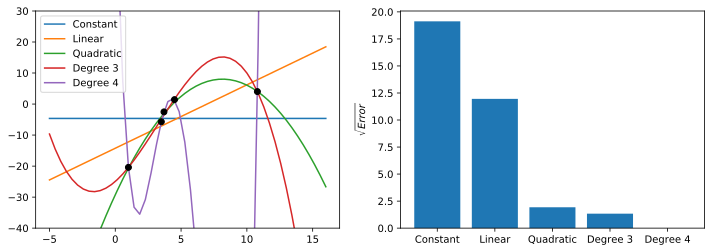

In [15]:
# Code for the polynomial fitting example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

xdata = np.array([1,3.5,3.7,4.5,10.8])
ydata = np.array([-20.4,-5.71,-2.52,1.43,4.02])
x = np.linspace(-5,16,50)
fig = plt.figure(figsize=(12,4))
models = [np.polyfit(xdata,ydata,d) for d in range(5)]
ax = fig.add_subplot(121)
ax.scatter(xdata,ydata,zorder=3,c='k')
names = ["Constant","Linear","Quadratic","Degree 3","Degree 4"]
for i in range(0,5):
    ax.plot(x,np.polyval(models[i],x),label=names[i])
ax.legend()
ax.set_ylim(-40,30)
axerr = fig.add_subplot(122)
residuals = []
for i in range(0,5):
    res = ydata - np.polyval(models[i],xdata)
    residuals.append(np.linalg.norm(res))
axerr.bar(range(0,5),residuals)
axerr.set_xticks(range(0,5))
axerr.set_xticklabels(names)
axerr.set_ylabel("$\sqrt{Error}$")
#fig.show()
pass

There are 5 datapoints in this example, and the constant and linear models do a poor job of fitting the data.  A quadratic and cubic (degree 3) fit are able to achieve low error, with the cubic polynomial doing a bit better in terms of error while oscillating a bit more than the quadratic one.  The quartic (degree 4) fit goes even further still, achieving 0 error!  But if we examine the behavior of the polynomial, the oscillations are quite severe, and in the range $[6,10]$ it makes an unintuitive dip downward.  Most of us would agree that the purple curve would be a very poor model for this data.  This suggests that perhaps goodness-of-fit is not the only criterion we should consider when deciding upon a model?  We will discuss this in much more detail in the next section.

Let us delay on that point for one moment, and mention the question of polynomial bases with multivariate input.  Suppose for now $\mathbf{x}$ is 2D with a 1D output.  One approach to enrich the class of linear models on this space would be to allow sums of univariate polynomials of maximum degree $d$ in each of the components $x_1$ and $x_2$.  In other words we define the model class:

$$ y = \theta_{0} + \theta_{1,1} x_1 + \ldots + \theta_{1,d} x_1^d + \theta_{2,1} x_2 + \ldots + \theta_{2,d} x_2^d $$

which has $2n+1$ monomial features $\mathbf{g}(\mathbf{x}) = (1,x_1,x_1^2,\ldots,x_1^d,x_2,x_2^2,\ldots,x_2^d)$.  In general for $d$ dimensional input we can define a similar feature space with $nd+1$ dimensions.

For even greater expressiveness, we could allow polynomial _combinations_ of input elements, such as $x_1 x_2$, $x_1^2 x_2^3$, and so on and so forth.  The canonical monomial basis of maximum degree $d$ consist of all possible products of powers of input elements.  For example, with 3-D input and maximum degree 2, the monomial basis is $(1,x_1,x_2,x_3,x_1^2,x_2^2,x_3^2,x_1 x_2,x_1 x_3,x_2 x_3)$.  In general, there are ${d+n}\choose{d}$ components in such a feature space.

### Separability

Separability is a useful property that can break a complex estimation process into several smaller estimation processes.  Suppose we can map our parameter vector into subsets
$$\mathbf{\theta} = \begin{bmatrix}\mathbf{\theta}_A \\ \mathbf{\theta}_B \end{bmatrix}$$
so that the error function can be broken into two independent summands:
$$ E(\mathbf{\theta};D) = E_A(\mathbf{\theta}_A;D) + E_B(\mathbf{\theta}_B;D). $$
Then, we can estimate each of the components separately by optimizing $E_A$ over $\mathbf{\theta}_A$, optimizing $E_B$ over $\mathbf{\theta}_B$, and then reassembling the results to obtain $\mathbf{\theta}$.  Specifically,
$$ \mathbf{\theta}^\star = \arg \min_\theta E(\mathbf{\theta};D) = \begin{bmatrix} \mathbf{\theta}_A^\star \\ \mathbf{\theta}_B^\star \end{bmatrix} = \begin{bmatrix} \arg \min_{\theta_A} E_A(\mathbf{\theta}_A;D) \\ \arg \min_{\theta_B} E_B(\mathbf{\theta}_B;D) \end{bmatrix}.$$

A similar construction can be used to separate a large estimation into an arbitrary number of independent estimations.


### Overfitting, generalization, and regularization

As shown above in the polynomial fitting example, it is critically important to realize that goodness-of-fit is only one comopnent of the quality of a model.  The reason is that if the model is given enough parameters to tune, it may be able to fit a given dataset $D$ arbitrarily well.  The ability of a model to fit datasets of a given size is also known as the _capacity_ of the model, and there are indeed models, like neural networks, which can be configured to have vast amounts of capacity.   Let us step back a moment and realize that $D$ only contains a small sampling of the infinite possible situations that we would actually like our model to fit well.  So, our actual goal is to build a model that _generalizes well_ from a small dataset to the entire space of inputs.

_Overfitting_ is the name given to the phenomenon where a model achieves a good fit to $D$, while generalizing poorly to inputs that are outside of $D$.  Avoiding overfitting is the primary challenge in estimation problems found in calibration as well as statistics and machine learning.  How can we be sure a model generalizes when we are only presented with a finite number of data points?  And how ought we deal with the practical labor / time constraints of data gathering, which encourage us to find a dataset as small as possible?

#### Training and testing sets, cross-validation
One possibility is to use an auxiliary draw of the data $D^\prime$ to represent points outside of the dataset used to estimate the model.  In this way, $D$ is called the _training set_ and $D^\prime$ is called the _testing set_.  Both are typically assumed to be drawn from the same underlying distribution of real-world conditions.  The value of the error function  $E(\theta^\star;D)$ on the training set $D$ is called the _training error_ while the value of the error function $E(\theta^\star;D^\prime)$ on the testing set $D^\prime$ is the _testing error_.  If a model has both low training error and testing error, then assuming the testing set represents real-world conditions, then we can be reasonably assured that it will generalize well.  On the other hand, if testing error is large, then it can be concluded that the model is overfitting.

It is important in this process **not to train the model on any elements in the testing set**.  The value $\theta^\star$ is _fixed_ after minimizing $\theta^\star \gets \arg \min_\theta E(\theta;D)$, and the testing error is evaluated without re-training on $D^\star$.  It is often tempting for a beginner to seek lower testing error by also training on $D^\star$ (i.e., optimizing $E(\theta;D \cup D^\star)$.  But this is the cardinal sin of estimation!  By including elements of the test set into training, the model is "peeking" at the test, and hence the seemingly positive results are actually bogus. 

TODO: _Cross-validation_

#### Regularization

TODO: describe L2, L1 regularization.

### Performance measurement

Performance of a calibration should be reported using some error metric both on testing and training sets.

Goodness-of-fit can be reported in terms of the following aggregate metrics:

**Sum of squared errors (SSE)**:
$$\sum_{i=1} \|y^{(i)} - \hat{y}^{(i)}\|^2$$

* Advantages: smooth derivatives.
* Disdvantages: varies by number of observations, units are units-of-y squared.

**Mean squared error (MSE)**:
$$\frac{1}{N} \sum_{i=1} \|y^{(i)} - \hat{y}^{(i)}\|^2$$
* Advantages: smooth derivatives, gives a sense of average performance.  Same optimum as SSE.
* Disdvantages: units are units-of-y squared.

**Root mean squared error (RMSE)**:
$$\sqrt{\frac{1}{N} \sum_{i=1} \|y^{(i)} - \hat{y}^{(i)}\|^2}$$
* Advantages: units are same as units-of-y, gives a sense of average performance.  Same optimum as SSE/MSE.
* Disdvantages: derivatives are not smooth.

**Mean absolute error (MAE)**:
$$\frac{1}{N} \sum_{i=1} \|y^{(i)} - \hat{y}^{(i)}\|$$
* Advantages: units are same as units-of-y, gives a sense of average performance.
* Disdvantages: derivatives are even less smooth than RMSE.

It can generally be concluded that SSE or MSE are the most convenient for optimization, while RMSE and MAE are most convenient for reporting results.  These can also be generalized to other metrics than the Euclidean distance 
$ d(y,\hat{y}) = \|y - \hat{y}\|. $

## Identifiability

In many parametric calibration problems the actual _values of the parameters_ are more important to estimate accurately, rather than a low error value.  For example, if we are calibrating a camera pose, it is not so important what the locations of the markers were during the calibration process.  But the error function directly measures how closely the estimated pose predicts the locations of the markers.  We should hope that if the parameters fit well, then these parameters should also be close to their true values.  But this is not always the case!  In problems that are _identifiable_ , we can ensure that parameter estimates will be accurate to some amount proportional to the goodness-of-fit.  In problems that are _non-identifiable_ , such guarantees cannot be made.

More precisely, we are concerned with whether the estimated parameter values $\hat{\mathbf{\(\theta\)}} = \arg \min_{\mathbf{\(\theta\)}} E(\mathbf{\(\theta\)};D) $ are close to their actual values $\mathbf{\(\theta\)}$.  Specifically, we are concerned with the estimation error:
$$\| \mathbf{\(\theta\)} - \hat{\mathbf{\(\theta\)}} \|$$
One cause of estimation error is that the dataset $D$ has a finite number of samples which may be noisy, and this noise may affect some dimensions of $\mathbf{\(\theta\)}^\star$ more than others.  By studying how the error function relates to parameter variations, we can quantify to a first degree how susceptible our model is to noise.  A second, more severe cause of error is that there may be _multiple parameters that achieve the minimum fitting error_.  Such cases are called non-identifiable.

### Non-identifiable problems

Let us study the quadratic Taylor expansion of $E$ centered at an optimum $\theta^\star$:
$$E(\theta;D) \approx E(\theta^\star;D) + \nabla_\theta E(\theta^\star;D) (\theta - \theta^\star) + \frac{1}{2} (\theta - \theta^\star) \nabla^2_\theta E(\theta^\star;D)(\theta - \theta^\star). $$
We know that the gradient  $\nabla_\theta E(\theta^\star;D)=0$ because it is an optimum.  Hence the behavior of the error function as a function of $\theta$ is dominated by the term $\frac{1}{2} (\theta - \theta^\star) \nabla^2_\theta E(\theta^\star;D)(\theta - \theta^\star)$.  The Hessian matrix
$$H = \nabla^2_\theta E(\theta^\star;D)$$
is the critical quantity here.  If $H$ is rank deficient, there exists one or more dimensions in $\theta$ space that locally do not change the error function value.  Hence, a problem is non-identifiable when $H$ is rank deficient.

A common case of rank-deficiency is when there are fewer values in the dataset than unknown parameters: $N dim(\mathbf{y}) < dim(\mathbf{\(\theta\)})$.  The solution is to add more data points.  Another common case is a geometric degeneracy.  This can happen when trying to estimate rotations from the 3D locations of two points: there is ambiguity in the axis of rotation.  Another geometric degeneracy is when trying to estimate both the size and distance of an object from a camera image alone.


### Parameter sensitivity and standard error

Let us now return to the question of parameter sensitivity.  Since $E$ is at a minimum, $H$ is a symmetric positive semi-definite matrix.  This implies that the shape of $E$ is locally approximated by a quadratic "bowl" shape.  The eigenvalues of $H$ determine the steepness of the bowl in different dimensions.  If $H$ has a small eigenvalue $\lambda_i$ with corresponding eigenvector $v_i$, then changes of $\theta$ in the $\pm v_i$ dimension will have a correspondingly small change of cost.  In particular, if $\theta$ moves from the optimum by distance $\pm 1/\sqrt{\lambda_i}$ in the direction $v_i$, then the cost will change by approximately 1/2.

We can make this more precise by a statistical argument.  If we considered the selection of the dataset $D$ as an "experiment", and by running more experiments we could draw an increasing number of datasets $D_1,D_2,D_3,\ldots$.  For each of these datasets, we could run parameter estimation to obtain estimates $\hat{\theta}_1,\hat{\theta}_2,\hat{\theta}_3,\ldots$, which would not in generally be the same: because of noise in the drawn dataset, each of these estimates will be somewhat different.  We can study how far $\hat{\theta}_1,\hat{\theta}_2,\hat{\theta}_3,\ldots$ deviate from the true value $\theta$.  In particular, the covariance matrix
$$Var(\theta) = \lim_{N\rightarrow \infty} 1/N \sum_{i=1}^N (\theta_i - \theta) (\theta_i - \theta)^T$$
tells us how wildly the estimates deviate from the true value.  In particular, the square root of the diagonal of $Var(\theta)$ is called the _standard error_ , and tells us how far $\hat{\theta}$ deviates from $\theta$ on average.

Via a derivation beyond the scope of this course, if we knew that the probability of drawing a particular $y$ for a given $x$ is proportional to $exp(-0.5 e(y,f(x,\theta))$, it can be shown that the inverse of the Hessian matrix gives an approximation of the covariance matrix:
$$Var(\theta) \approx H^{-1}. $$
In other words, the "sharper" the error function at the optimum, the less variability we should expect to see in the parameter estimates.

In general, the variance decreases proportionally to the inverse of $|D|$, which means the standard error decreases proportionally to the inverse square root of $|D|$.  Hence, to increase accuracy by a factor of 2, the size of the dataset must be increased by a factor of 4; to increase accuracy by a factor of 10, the size of the dataset must be increased by a factor of 100.

## Nuisance parameters

In many calibration problems we would like to estimate some parameters of concern $\theta_C$ accurately, but in order to do so we need to estimate other terms in the optimization.  These _nuisance parameters_ are not observables or parameters of concern, but rather deal with some variable encountered during the calibration process.  For example, to calibrate a multi-camera motion capture system, a human will wave a marker in front of the cameras across the workspace.  The trajectory taken by the marker is not important, but we certainly don't have ground truth on this.  Hence, it will need to be optimized.

To optimize nuisance parameters, we simply gather them in a vector $\theta_N$ and optimize over the concatenated parameters $\theta = (\theta_C,\theta_N)$.  However, one problem that may arise during the design of the calibration procedure is when nuisance parameters are added for each observation. Then the estimation problem may become unidentifiable (particularly when the number of nuisance parameters exceeds the number of outputs for an observation), or very high dimensional.

As an example, suppose we are trying to optimize a robot's gripper location (center of the gripper opening) by moving the robot to touch an object at the same local point, but when the object is at a variety of different poses.  We observe configurations $q^{(1)},\ldots,q^{(N)}$ and object transforms $T_O^{(1)},\ldots,T_O^{(N)}$.  We wish to estimate $\mathbf{x}_G^k$, the gripper location on link $k$.   We can derive the link transforms $T_k^{(i)} = T_k(q^{(i)})$ from forward kinematics.  But we do not know the gripper point relative to the object ${\mathbf{x}_G^O}^{(i)}$, so we consider letting $\theta_N = ({\mathbf{x}_G^O}^{(1)},\ldots,{\mathbf{x}_G^O}^{(N)})$. Is this identifiable?  Let's examine the error function.  The $i$'th gripper point is $\mathbf{x}_G^{(i)} = T_k^{(i)} \mathbf{x}_G^k$, so the predicted gripper coordinates in the object frames are ${T_O^{(i)}}^{-1} T_k^{(i)} \mathbf{x}_G^k$.  We would like ${T_O^{(i)}}^{-1} T_k^{(i)} \mathbf{x}_G^k \approx {\mathbf{x}_G^O}^{(i)}$ for all $i=1,\ldots,N$.  This gives only $3N$ constraints and $3+3N$ unknowns!  Hence, this is not identifiable.

Some care must be taken during the setup procedure.  If we can constrain some of the object-relative gripper positions to be equal, so that $\mathbf{x}_G^O \equiv {\mathbf{x}_G^O}^{(1)}=\cdots={\mathbf{x}_G^O}^{(N)}$, then we can set $\theta_N = \mathbf{x}_G^O$, and we have only 3 nuisance parameters.  The number of constraints remains at $3N$ and the number of unknowns becomes $3+3=6$.

## Calibrating rigid transforms

Calibration problems with rigid transforms require some special care to estimate reliably and efficiently due to the use of rotation parameters, which tend to exhibit problems with singularities, nuisance parameters, and local minima.  But due to the special structure of rotation matrices, for some estimation problems we can derive analytical solutions.

In this section we will often use the fact that the mean of a set of points minimizes the sum-of-squared distances to points in the set.  More precisely,
$$ \overline{\mathbf{x}} = 1/N \sum_{i=1}^N \mathbf{x}^{(i)} = \arg \min_{\mathbf{x}} \|\mathbf{x} - \mathbf{x}^{(i)}\|^2.$$
This gives a closed form solution to many common estimation problems.

### Rigid point set matching (Procrustes problem)

A common problem in robotics and computer vision is to find a rotation or rigid transform to match points in one set to another.  Specifically, assume we have points $\mathbf{a}^{(1)},\ldots,\mathbf{a}^{(N)}$ defined in some local frame, with which would like to match to points $\mathbf{b}^{(1)},\ldots,\mathbf{b}^{(N)}$ defined in some world frame.  As it turns out, there is an efficient, analytical way to determine the optimal transform.  (It is important to note that this process assumes a direct, one-to-one matching between point sets; that is, point $\mathbf{a}^{(i)}$ should be matched to $\mathbf{b}^{(i)}$ after rotation for all $i$.  This is different from an unmatched problem, in which a point in the first set can be matched to any point in the second, and we must figure out both the rigid transform and the association between points.  For this latter problem, see the ICP algorithm.)

To find a rotation matrix $\mathbf{b} = R\mathbf{a}$, we would like to minimize the sum of squared errors
$$E(R) = \sum_{i=1}^N \| R \mathbf{a}^{(i)} - \mathbf{b}^{(i)} \|^2 $$
over orthogonal matrices $R$.  To find a rigid transformation $\mathbf{b} = R\mathbf{a} + \mathbf{t}$, we minimize
$$E(R,\mathbf{t}) = \sum_{i=1}^N \| R \mathbf{a}^{(i)} + \mathbf{t} - \mathbf{b}^{(i)} \|^2 $$
over orthogonal matrices $R$ and translations $\mathbf{t}$.

Let us first examine the rotation fitting problem, which is also known as the _orthogonal Procrustes problem_.  Let us define the loss function as a Frobeneus norm of a matrix expression
$$ E(R) = \| R A - B \|_F^2 $$
Where the Frobeneus norm is the most natural analogue to the Euclidean norm for matrices:
$$\|X\|_F = \sqrt{\sum_{i,j} x_{i,j}^2}.$$

To do so, we set up $A = \begin{bmatrix} \mathbf{a}^{(1)} & \cdots & \mathbf{a}^{(N)} \end{bmatrix}$ and $B = \begin{bmatrix} \mathbf{b}^{(1)} & \cdots & \mathbf{b}^{(N)} \end{bmatrix}$.  Observe that $RA$ is the matrix whose columns are all the rotated $\mathbf{a}$ vectors, and the Frobeneus norm sums up all the squared errors for each rotated vector.

If we denote the matrix inner-product $A \cdot B = \sum_{i,j} a_{i,j} b_{i,j} = tr(A^T B)$, we have 
$$ E(R) = (R A - B)\cdot (R A - B) = \|A\|_F^2 +  \|B\|_F^2 -  (RA \cdot B) $$
Since we are minimizing over $R$ and the first two summands do not depend on $R$, we have 
$$ \arg \min_R E(R) = \arg \max_R (RA \cdot B), $$
so let us focus on the last term.  By rewriting the inner product as a trace, $(RA \cdot B) = tr(A^T R B)$, and since the trace is invariant under cyclic permutations, $tr(A^T R B) = tr(R B A^T)$.  Hence, we would like to find
$$\arg \max_R (R^T \cdot B A^T). $$
Let us perform the singular value decomposition of $BA^T = U \Sigma V^T$ with $\Sigma$ diagonal, and $U$ and $V$ orthonormal.  We can see that $(R^T \cdot B A^T) = (R^T \cdot U \Sigma V^T) = tr(R U \Sigma V^T) = tr(V \Sigma U^T R) = tr(\Sigma, U^T R V) = (\Sigma \cdot U^T R V)$. 

Since $U^T R V$ is an orthonormal matrix and $\Sigma$ is diagonal and nonnegative, the maximizer of $(\Sigma \cdot U^T R V)$ over all possible orthonormal matrices should satisfy $(U^T R V = I)$.  Hence, $R = U V^T$ is the optimum. 
(_Note that if $\Sigma$ contains any zero entries on the diagonal, then the point set is degenerate, and it is not guaranteed that $U$ or $V$ calculated by an SVD has positive determinant.  Some care must therefore be taken to flip the row of $U$ and column of $V$ corresponding to such values so that the determinant is indeed positive._ )

Let us return to the transform fitting problem.  Let us consider the subproblem of minimizing $E(R,\mathbf{t})$ with respect to $\mathbf{t}$, which would require setting its gradient to 0.  First we take the gradient of the summand:
$$\frac{\partial}{\partial \mathbf{t}} \| R \mathbf{a}^{(i)} + \mathbf{t} - \mathbf{b}^{(i)} \|^2 = \frac{\partial}{\partial \mathbf{t}}\left(\|\mathbf{t}\|^2  + 2\mathbf{t}^T (R \mathbf{a}^{(i)} - \mathbf{b}^{(i)}) + \| R \mathbf{a}^{(i)} - \mathbf{b}^{(i)} \|^2\right) = 2\mathbf{t} + 2 (R \mathbf{a}^{(i)} - \mathbf{b}^{(i)}). $$
Next we replace this into the gradient of the error function:
$$\frac{\partial E}{\partial \mathbf{t}} = \sum_{i=1}^{N} \frac{\partial}{\partial \mathbf{t}} \| R \mathbf{a}^{(i)} + \mathbf{t} - \mathbf{b}^{(i)} \|^2  =  2 \sum_{i=1}^{N} (\mathbf{t} + R \mathbf{a}^{(i)} - \mathbf{b}^{(i)}).$$
Setting this to 0, dividing by 2N, and pulling out terms from the summation that do not depend on $i$, we see that
$$ 0 = 1/2 \frac{\partial E}{\partial \mathbf{t}} = N\mathbf{t} + R \sum_{i=1}^{N} \mathbf{a}^{(i)} - \sum_{i=1}^{N} \mathbf{b}^{(i)}.$$
If we were to divide this expression by $N$, we can see that the sums become means, and have
$$\mathbf{t} = \overline{\mathbf{b}} - R \overline{\mathbf{a}}$$
with $\overline{\mathbf{a}} = 1/N \sum_{i=1}^{N}a^{(i)}$ and $\overline{\mathbf{b}} = 1/N \sum_{i=1}^{N}b^{(i)}$.

Replacing the expression for the optimal $\mathbf{t}^\star$ back in the error function, we get $E(R,\mathbf{t}^\star) = \sum_{i=1}^N \| R (\mathbf{a}^{(i)}-\overline{\mathbf{a}})  - (\mathbf{b}^{(i)}-\overline{\mathbf{b}}) \|^2 $.  This can be thought of as simply a rotation fitting problem on the shifted datasets $\tilde{\mathbf{a}}^{(i)} = \mathbf{a}^{(i)}-\overline{\mathbf{a}}$ and $\tilde{\mathbf{b}}^{(i)} = \mathbf{b}^{(i)}-\overline{\mathbf{b}}$, for $i=1,\ldots,N$.

The overall running time of this procedure is O(N) if we assume dimension is constant, because no matrix has more than O(N) entries and the SVD is performed on a 2x2 or 3x3 matrix.  The below figures show the result of this proceedure in 2D, where each vertex in the black polygon is associated with 10 blue points.  The estimated transform is drawn as the red and green frame.


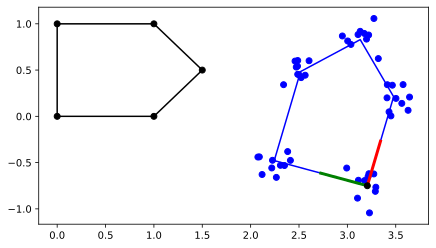

In [5]:
#Code for point set fitting figure
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import math
from klampt.math import so2,vectorops

def point_fit_rotation(a,b):
    assert len(a)==len(b)
    A = np.array(a).T
    B = np.array(b).T
    BAt = np.dot(B,A.T)
    U,W,Vt = np.linalg.svd(BAt)
    R = np.dot(U,Vt)
    return R

def point_fit_transform(a,b):
    assert len(a)==len(b)
    A = np.array(a).T
    B = np.array(b).T
    amean = np.average(A,axis=1)
    bmean = np.average(B,axis=1)
    A = A - np.column_stack([amean]*len(a))
    B = B - np.column_stack([bmean]*len(b))
    BAt = np.dot(B,A.T)
    U,W,Vt = np.linalg.svd(BAt)
    R = np.dot(U,Vt)
    return R,bmean-np.dot(R,amean)

T2 = (np.array(so2.matrix(1.3)),np.array([3.2,-0.75]))
N = 10
noise = 0.1
localpts = [(0,0),(1,0),(1.5,0.5),(1,1),(0,1)]
a = localpts*N
b = [np.dot(T2[0],pt)+T2[1]+np.random.randn(2)*noise for pt in a]
R = point_fit_rotation(a,b)
R,t = point_fit_transform(a,b)

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.scatter([pt[0] for pt in localpts],[pt[1] for pt in localpts],c='k')
ax.plot([pt[0] for pt in localpts+[localpts[0]]],[pt[1] for pt in localpts+[localpts[0]]],color='k')
ax.scatter([pt[0] for pt in b],[pt[1] for pt in b],c='b')
L = 0.5
ax.plot([t[0],t[0]+L*R[0,0]],[t[1],t[1]+L*R[1,0]],color='r',lw=3,zorder=5)
ax.plot([t[0],t[0]+L*R[0,1]],[t[1],t[1]+L*R[1,1]],color='g',lw=3,zorder=5)
ax.plot([t[0]+np.dot(R,pt)[0] for pt in localpts+[localpts[0]]],[t[1] + np.dot(R,pt)[1] for pt in localpts+[localpts[0]]],color='b')
ax.scatter([t[0]],[t[1]],c='k',zorder=6)
#fig.show()
pass

### Rotation averaging

One common problem with rigid transforms is how to fit a rotation matrix $R$ to a dataset of rotations $R^{(1)},\ldots,R^{(N)}$.

#### Parameterization of SO(3)

First, we may assume some rotation matrix parameterization $R(\mathbf{\(\theta\)})$.  It may be possible to use a minimal parameterization of SO(3), such as Euler angles or rotation vectors, but these exhibit problems with singularities and the domain of validity.  It may also be possible to use the 9 parameters of 3x3 matrices, but these need to be constrained to obey the orthogonality constraints of SO(3).  

If the parameterization is not minimal, we must include in our optimization constraints on the parameters $h(\mathbf{\(\theta\)})=0$ and use constrained optimization techniques.  Another alternative is to use _projection techniques_ , which automatically cast a parameter vector into the range of valid parameters.  Most easily this is illustrated with quaternions.  If we consider the range of all quaternions $\mathbf{\(\theta\)} \in \mathbb{R}^4$, we would like to restrict ourselves to the set of unit quaternions $\mathbf{\(\theta\)} \in S^4$ because this is the manifold of quaternions that represent rotations.  The quaternion-to-rotation conversion $R_q(\mathbf{\(\theta\)}/\|\mathbf{\(\theta\)}\|)$ can be fed the normalized quaternion, which defines a valid function in all of $\mathbb{R}^4$ except at the origin.  

#### Goodness-of-fit in SO(3)

Second, it is not clear how to even measure goodness of fit between rotation matrices.  The Frobeneus norm gives a rotation loss function $e_F(R,\hat{R}) = \| R-\hat{R} \|_F^2$ that is analogous to the quadratic loss.  We could also use the absolute angle loss $e_\theta(R,\hat{R}) = angle(R^T \hat{R})$ with $angle(R) = \cos^{-1}((tr(R)-1)/2)$ the absolute angle as described in [Chapter 4](3DRotations.ipynb).

It can be shown, with a bit of work, that $e_F = 4 - 4 \cos e_\theta$, which is monotonically increasing on the range $e_\theta \in [0,\pi]$.  There is a slight advantage in using $e_\theta$ as the loss function, which is that the cosine term in the $e_1$ loss function diminishes the importance of small errors, so that the cost of a larger absolute angular deviation is proportionally much higher than the sum of many smaller deviations.  This makes the Frobeneus norm more sensitive to outliers.

#### Analytical solution

We can use the Procrustes problem to derive an analytic solution to the minimum Frobeneus loss problem.  The Frobeneus loss can be reinterpreted as an orthgonal matching problem between the three basis vectors rotated by $R$ and the rotated basis vectors in the dataset:
$$ e_F(R,\hat{R}) = \sum_{j=1}^3 \| \hat{R} \mathbf{e}_j - R \mathbf{e}_j \|^2. $$

To determine the optimal $\hat{R}$, we can use the SVD method as [defined in the above section](#Rigid-point-set-matching-(Procrustes-problem)).

#### Iterative averaging 

We discuss two iterative numerical methods for rotation averaging, which operate on the square of absolute angle loss $e_\theta^2$. 

One approach is quaternion averaging with projection.  The mean of the rotations is taken in quaternion space, which produces a non-unit quaternion, then this is projected to the unit hypersphere.  Letting $q^{(1)},\ldots,q^{(N)}$ be the quaternion representations of $R^{(1)},\ldots,R^{(N)}$, we can determine the mean $\overline{q} = 1/N \sum_{i=1}^N q^{(i)}$.   The unit quaternion in this direction, $\overline{q} / \| \overline{q}\|$, is then converted to a rotation matrix.  There are two issues with this approach.  First, due to the dual representation of quaternions ($q$ and $-q$ both represent the same rotation) it is important to ensure that each of the quaternions are assigned a sign to keep them in the same hemisphere and ideally packed closely together.  One approach to doing this is to incrementally perform averages throughout the dataset, choosing the sign of the next quaternion to minimize distance to the running average.  Second, there is no clear loss function that this approach minimizes.  Nevertheless, we can still guarantee that as the angular spread of the rotation samples grows closer, the average performed in this way will approach the true best-fit rotation.

A second approach is incremental geodesic interpolation.  Compared to quaternion averaging, this can do a better job approaching the true optimum when the spread of the samples is large.  The idea is that taking the mean of a set of points in Cartesian space can be interpreted as a sequence of incremental linear interpolations.  If we use the same procedure but replace linear interpolations with geodesic interpolation on SO(3) we obtain an analogue to the mean.  

The main idea exploits the fact that in Cartesian space, the mean of a set of $N$ points can be derived from by interpolating between the the $N$'th point and the mean of the first $N-1$ points.  Let $\overline{\mathbf{x}}_N$ be the mean of the first $N$ points and $\overline{\mathbf{x}}_{N-1}$ be the mean of the first $N-1$ points.  We see that
$$\overline{\mathbf{x}}_N  = \frac{1}{N} \sum_{i=1}^N \mathbf{x}^{(i)} = \frac{1}{N} (\mathbf{x}^{(N)} + \sum_{i=1}^{N-1} \mathbf{x}^{(i)})$$
Using
$$\overline{\mathbf{x}}_{N-1} = \frac{1}{N-1} \sum_{i=1}^{N-1} \mathbf{x}^{(i)})$$
to derive $\sum_{i=1}^{N-1} \mathbf{x}^{(i)} = (N-1)\overline{\mathbf{x}}_{N-1}$, we can replace this in the above expression to get
$$\overline{\mathbf{x}}_N = \frac{1}{N} \mathbf{x}^{(N)} + \frac{N-1}{N} \overline{\mathbf{x}}_{N-1}.$$
This is simply a linear interpolation $1/N$ of the way from $\mathbf{x}^{(N)}$ to $\overline{\mathbf{x}}_{N-1}$.

Let us apply this to rotations using the SO(3) [geodesic interpolation discussed in Chapter 4](3DRotations.ipynb#Geodesic-interpolation).  Let us denote $\overline{R}_k$ as the average of the first $k$ rotations defined in the following sense.  The base case is $\overline{R}_1 = R^{(1)}$.  For $k>1$, define
$$\overline{R}_k = SO3interp(R^{(k)},\overline{R}_{k-1},1/k).$$
Then, $\overline{R}_N$ is an estimate of the average rotation. 

This procedure does have a drawback in that the order of rotation samples in the dataset affects the final result.  To obtain even better results, this procedure can continue multiple passes through the dataset (with $k$ continually increasing), as though the dataset were duplicated some number of times. In the limit of an infinite number of passes, this procedure will converge regardless of the order of the dataset.


c:\python37\lib\site-packages\ipykernel_launcher.py:198: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


HTML(value='<h4>N=50, 5 outliers</h4>')

HTML(value='<table style="border-style: solid;"><tr><td style="padding: 0px 5px 0px 5px;"></td><td style="padd…

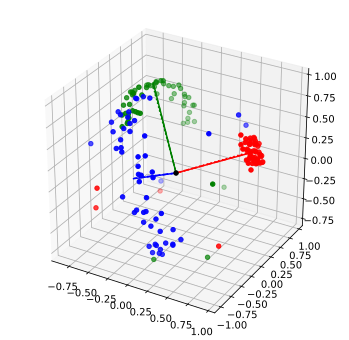

In [6]:
# Code to generate the rotation interpolation figure
from __future__ import print_function,division
from builtins import range
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from klampt.math import so3,vectorops
import time
import random
from ipywidgets import HTML

#an error will be raised if the mean from rotation_average_q has a norm less than this
EPSILON = 1e-7

N = 50
Noutliers = 5
R0 = so3.from_moment([1.2,-0.3,0.4])
spread = np.array([2.0,0.5,0.3])
Rdata = [so3.mul(R0,so3.from_moment(np.random.uniform(-1,1,3)*spread*0.5)) for i in range(N)]
#Rdata = [so3.mul(R0,so3.from_moment(np.random.randn(3)*spread*0.5)) for i in range(N)]

#add an outlier?
if Noutliers > 0:
    Rdata = Rdata + [so3.mul(so3.from_moment([-0.5,0.0,-1.0]),so3.from_moment(np.random.randn(3)*1.5)) for i in range(Noutliers)]
    #shuffle the order of the outlier
    random.shuffle(Rdata)

def rotation_error(R,Rdata):
    """Sum of absolute angle error"""
    res = 0.0
    for Q in Rdata:
        res += so3.angle(so3.mul(so3.inv(R),Q))
    return res

def rotation_error2(R,Rdata):
    """Sum of squared absolute angle error"""
    res = 0.0
    for Q in Rdata:
        res += so3.angle(so3.mul(so3.inv(R),Q))**2
    return res

def rotation_error2_frob(R,Rdata):
    """Returns sum of squared frobeneus error"""
    res = 0.0
    for Q in Rdata:
        res += np.dot(vectorops.sub(R,Q),vectorops.sub(R,Q))
    return res

error_fn = rotation_error
#error_fn = rotation_error2
#error_fn = rotation_error2_frob

def rotation_average_euler(Rdata,R0):
    def f(ea):
        return error_fn(so3.from_rpy(ea),Rdata)
    ea0 = so3.rpy(R0)
    res = minimize(f,ea0)
    return so3.from_rpy(res.x)

def rotation_average_svd(Rdata):
    xyz = [(1,0,0),(0,1,0),(0,0,1)]
    a = xyz*len(Rdata)
    b = sum([[so3.apply(R,xyz[0]),so3.apply(R,xyz[1]),so3.apply(R,xyz[2])] for R in Rdata],[])
    R = point_fit_rotation(a,b)
    return so3.from_matrix(R)

def rotation_average_q(Rdata):
    qdata = np.array([so3.quaternion(R) for R in Rdata])
    qmean = qdata[0]
    for i in range(1,len(qdata)):
        if np.dot(qdata[i],qmean) < 0:
            qi = -qdata[i]
        else:
            qi = qdata[i]
        qmean = (1/float(i+1))*qi + (i/float(i+1))*qmean
    qlen = np.linalg.norm(qmean)
    if qlen < EPSILON:
        raise ValueError("Rotation average ill-defined")
    return so3.from_quaternion(qmean / qlen)

def rotation_average_iterative(Rdata,passes=1):
    Rmean = None
    for p in range(passes):
        k = p*len(Rdata)
        for i in range(len(Rdata)):
            n = k+i+1
            try:
                Rmean = so3.interpolate(Rmean,Rdata[i],1.0/float(n))
            except Exception:
                Rmean = Rdata[0]
    return Rmean

def draw_rotation(ax,R,**kwargs):
    o = [0,0,0]
    x = so3.apply(R,[1,0,0])
    y = so3.apply(R,[0,1,0])
    z = so3.apply(R,[0,0,1])
    ax.plot([o[0],x[0]],[o[1],x[1]],[o[2],x[2]],c='r',**kwargs)
    ax.plot([o[0],y[0]],[o[1],y[1]],[o[2],y[2]],c='g',**kwargs)
    ax.plot([o[0],z[0]],[o[1],z[1]],[o[2],z[2]],c='b',**kwargs)

def showtable(data):
     display(HTML(
        '<table style="border-style: solid;"><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td style="padding: 0px 5px 0px 5px;">{}</td>'.format('</td><td style="padding: 0px 5px 0px 5px;">'.join(str(_) for _ in row)) for row in data)
        )
     ))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
Rdata_x = np.array([so3.apply(R,[1,0,0]) for R in Rdata])
Rdata_y = np.array([so3.apply(R,[0,1,0]) for R in Rdata])
Rdata_z = np.array([so3.apply(R,[0,0,1]) for R in Rdata])
ax.scatter(Rdata_x[:,0],Rdata_x[:,1],Rdata_x[:,2],c='r')
ax.scatter(Rdata_y[:,0],Rdata_y[:,1],Rdata_y[:,2],c='g')
ax.scatter(Rdata_z[:,0],Rdata_z[:,1],Rdata_z[:,2],c='b')
ax.scatter([0],[0],[0],c='k')

EULER = 'Min. Angle'
EULER2 = 'Min. Angle^2'
EULER2_FROB = 'Min. Frob^2'
SVD = 'SVD'
QUAT = 'Quaternion avg.'
ITER = 'Iter. interp.'
passes = 5
ITERS = 'Iter. interp. %d passes'%(passes,)
METHODS = [EULER,EULER2,EULER2_FROB,SVD,QUAT,ITER,ITERS]
data = dict((k,dict()) for k in METHODS)
Rest = dict()

error_fn = rotation_error
t0 = time.time()
Rest[EULER] = rotation_average_euler(Rdata,so3.identity())
t1 = time.time()
data[EULER]['Time (s)'] = t1-t0

error_fn = rotation_error2
t0 = time.time()
Rest[EULER2] = rotation_average_euler(Rdata,so3.identity())
t1 = time.time()
data[EULER2]['Time (s)'] = t1-t0

error_fn = rotation_error2_frob
t0 = time.time()
Rest[EULER2_FROB] = rotation_average_euler(Rdata,so3.identity())
t1 = time.time()
data[EULER2_FROB]['Time (s)'] = t1-t0

t0 = time.time()
for i in range(100):
    Rest[SVD] = rotation_average_svd(Rdata)
t1 = time.time()
data[SVD]['Time (s)'] = (t1-t0)/100
t0 = time.time()
for i in range(100):
    Rest[QUAT] = rotation_average_q(Rdata)
t1 = time.time()
data[QUAT]['Time (s)'] = (t1-t0)/100
t0 = time.time()
for i in range(100):
    Rest[ITER] = rotation_average_iterative(Rdata)
t1 = time.time()
data[ITER]['Time (s)'] = (t1-t0)/100
t0 = time.time()
Rest[ITERS] = rotation_average_iterative(Rdata,passes=passes)
t1 = time.time()
data[ITERS]['Time (s)'] = t1-t0
for k in METHODS:
    data[k]['MAE'] = (rotation_error(Rest[k],Rdata)/N)
    data[k]['RMSE'] = math.sqrt(rotation_error2(Rest[k],Rdata)/N)
    data[k]['RMSE Frob.'] = math.sqrt(rotation_error2_frob(Rest[k],Rdata)/N)
    data[k]['Ground truth error'] = np.linalg.norm(so3.error(Rest[k],R0))
draw_rotation(ax,R0)
draw_rotation(ax,Rest[EULER],linestyle=':')
draw_rotation(ax,Rest[QUAT],linestyle='--')
KEYS = ['Time (s)','MAE','RMSE','RMSE Frob.','Ground truth error']
tab = [[''] + ['<b>'+k+'</b>' for k in KEYS]]
bests = set()
for k in KEYS:
    vals = [data[m][k] for m in METHODS]
    vbest = min(vals)
    bests.add((k,min(zip(vals,METHODS))[1]))
    for v,m in zip(vals,METHODS):
        if abs(v-vbest) <= 1e-5:
            bests.add((k,m))
for m in METHODS:
    entries = ['%.5f'%(data[m][k],) for k in KEYS]
    for i,k in enumerate(KEYS):
        if (k,m) in bests:
            entries[i] = '<b>'+entries[i]+'</b>'
    tab.append(['<b>'+m+'</b>'] + entries)
fig.show()
display(HTML('<h4>N=%d, %d outliers</h4>'%(N,Noutliers)))
showtable(tab)

#### Position measurements of multiple observable markers

Now let us consider the case where the markers are point measurements, and they are always observed at each configuration.  Although it is possible to calibrate camera transform and marker transforms given a single marker, this usually requires the robot to move to many more configurations, since only $x$, $y$ coordinates are measured accurately at a single image.  Given 3 or more markers, it is possible to construct a fiducial reference frame $T_F$ in which the local positions of the markers $\mathbf{m}_1^F,\ldots,\mathbf{m}_M^F$ are known.  For example, fix the origin to $\mathbf{m}_1$, the X axis to the direction from $\mathbf{m}_1$ to $\mathbf{m}_2$, and the Z axis to the perpendicular normal between $\mathbf{m}_2-\mathbf{m}_1$ and $\mathbf{m}_3-\mathbf{m}_1$ (assuming $\mathbf{m}_1,\ldots,\mathbf{m}_3$ are not colinear).  

Because markers will likely be identified on a rectified camera image, the observations $z_{mj}^{(i)}$ will be x-y pixel coordinates determined by projection in an idealized pinhole camera.  The squared reprojection loss for marker $j$
$$e(z_{mj},\hat{z}_{mj}) = \|z_{mj}-\hat{z}_{mj}\|^2$$
has units in pixels squared, with
$$\hat{z}_{mj} = p(\mathbf{m}_j^C) = \begin{bmatrix} c_x x_{mj}^C / z_{mj}^C + d_x \\  c_y y_{mj}^C / z_{mj}^C + d_y \end{bmatrix} $$
where $\mathbf{m}_j^C = (x_{mj}^C,y_{mj}^C,z_{mj}^C)$ are the (predicted) marker coordinates in the camera frame.  As usual, the Z axis of the camera frame is assumed to be forward, and $c_x,c_y,d_x,d_y$ are scaling factors determined by the camera intrinsic calibration.

$\mathbf{m}_j^C$ is a function of the robot configuration $q$, the unknown extrinsic parameters $T_C^k$ and the nuisance parameters $T_F$.  Specifically,
$$\mathbf{m}_j^C(q) = (T_k(q) T_C^k)^{-1} T_F \mathbf{m}_j^F.$$
The overall error then sums the reprojection error over all markers and configurations
$$E(T_C^k,T_F;D) = \sum_{i=1}^N \sum_{j=1}^M e(z_{mj},p(\mathbf{m}_j^C(q^{(i)})).$$

Estimation is typically accomplished through numerical optimization of a joint 12D parameterization of $T_C^k$ and $T_F$.  Due to the singularity where any $z_{mj}=0$, the initial guesses for these transforms must place each marker in front of the camera.


### Static camera extrinsic calibration 

Another common extrinsic calibration procedure is to determine the pose of a static camera $T_C$ relative to the world.  This procedure will make use the robot's knowledge from forward kinematics.  The general procedure is as follows:

1. Attach $M \geq 1$  fiducial markers to the robot on link $k$.  $k$ is usually the end effector link.

2. Move the robot to several configurations $q^{(1)},\ldots,q^{(N)}$ in which the marker(s) are observed by the camera.  The camera provides observations $z_{m1}^{(1)},\ldots,z_{m1}^{(N)}$ of marker 1, $z_{m2}^{(1)},\ldots,z_{m2}^{(N)}$ of marker 2, and so on.  (If the $j$'th marker is not observed at the $i$'th configuration, we allow $z_{mj}^{(i)} = nil$.)

3. Optimize the camera transform $T_C$ and link-relative marker transforms $T_{m1}^k,\ldots,T_{mM}^k$ to minimize prediction error.

The model is quite similar to the eye-in-hand case, except the loss is converted to the camera frame as follows:
$$e(T_{mj}^C,\hat{T}_{mj}^C) = e(T_{mj}^C,T_C^{-1}T_k(q)T_{mj}^k).$$
As usual, we can optimize over $T_C$ and $T_{m1}^k,\ldots,T_{mM}^k$ using a numerical method.

In the case of pose measurements, we can use the block coordinate descent method.  The first phase optimizes $T_C$ as an average of $\{ T_k(q^{(i)})T_{mj}^k{z_{mj}^{(i)}}^{-1} \text{ for } i=1,\ldots,N \} $, and the second phase optimizes $T_{mj}^k$ as an average of $\{ T_k^{-1}(q^{(i)})T_C z_{mj}^{(i)} \text{ for }i=1,\ldots,N \}$.


### Camera-to-camera calibration 



### Object pose calibration through touching


## Calibrating dynamic models (system identification)

## Summary

## Exercises